In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv('games.csv')

In [3]:
data.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [4]:
data.shape

(81312, 20)

In [5]:
data.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [6]:
for i in data:
    if(data[i].isnull().sum())>0:
        print(f"Null values in {i} are {data[i].isnull().sum()}")

Null values in name are 41
Null values in yearpublished are 3
Null values in minplayers are 3
Null values in maxplayers are 3
Null values in playingtime are 3
Null values in minplaytime are 3
Null values in maxplaytime are 3
Null values in minage are 3


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

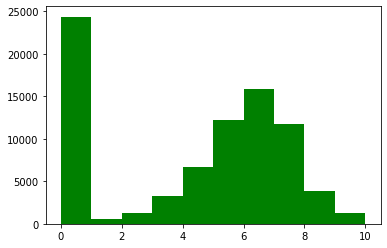

In [7]:
plt.hist(data['average_rating'],color='green')

In [8]:
#Removing all the games having rating 0 because that data is of no use for our model
data=data[data['users_rated']>0]

(array([  602.,  1232.,  2824.,  5212.,  8230., 13606., 13859.,  8471.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

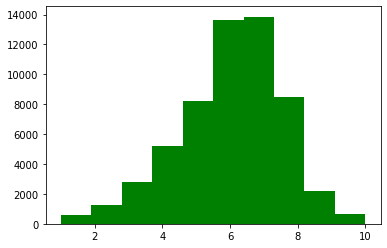

In [9]:
plt.hist(data['average_rating'],color='green')

In [10]:
data.dropna(axis=0,inplace=True)

In [11]:
data.drop(labels=['id'],axis=1,inplace=True)

<AxesSubplot:>

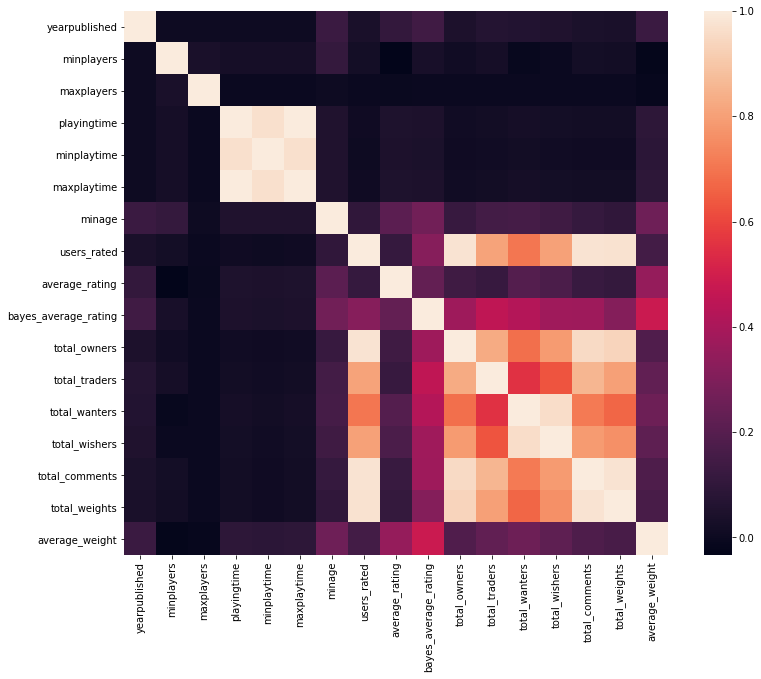

In [12]:
#Correlation Matrix

correl=data.corr()

fig=plt.figure(figsize=(13,10))

sb.heatmap(correl,square=True)

In [13]:
correl

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
yearpublished,1.000000,0.004308,0.004977,0.006235,0.005245,0.006235,0.125281,0.037454,0.108461,0.140998,0.047740,0.064403,0.062289,0.052534,0.043818,0.036226,0.125318
minplayers,0.004308,1.000000,0.037155,0.024320,0.026569,0.024320,0.110886,0.020364,-0.032701,0.034915,0.014594,0.024708,-0.008654,-0.003786,0.023033,0.019061,-0.021892
maxplayers,0.004977,0.037155,1.000000,-0.001020,-0.000950,-0.001020,0.004508,-0.000858,-0.008335,-0.003437,-0.000977,-0.002381,-0.003585,-0.002499,-0.001502,-0.001457,-0.013448
playingtime,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minplaytime,0.005245,0.026569,-0.000950,0.967909,1.000000,0.967909,0.052454,0.005502,0.043985,0.041845,0.008975,0.014484,0.017491,0.012737,0.010046,0.010172,0.084405
maxplaytime,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minage,0.125281,0.110886,0.004508,0.053471,0.052454,0.053471,1.000000,0.097885,0.210049,0.266937,0.118564,0.152313,0.154097,0.137476,0.113395,0.097084,0.259782
users_rated,0.037454,0.020364,-0.000858,0.010908,0.005502,0.010908,0.097885,1.000000,0.112564,0.317992,0.977664,0.807873,0.702433,0.805116,0.978708,0.975723,0.150597
average_rating,0.108461,-0.032701,-0.008335,0.048994,0.043985,0.048994,0.210049,0.112564,1.000000,0.231563,0.137478,0.119452,0.196566,0.171375,0.123714,0.109691,0.351081
bayes_average_rating,0.140998,0.034915,-0.003437,0.045341,0.041845,0.045341,0.266937,0.317992,0.231563,1.000000,0.371017,0.455021,0.426708,0.377213,0.371031,0.313302,0.482356


In [14]:
columns=data.columns.tolist()
columns=[c for c in columns if c not in ['bayes_avearge_rating','name','type','average_rating']]

# By boxplot it can be seen that the dataset has lot of outliers which will effect the model

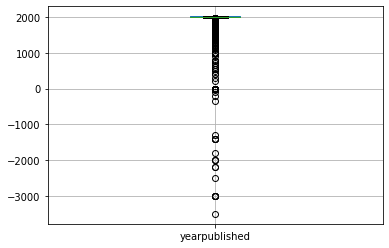

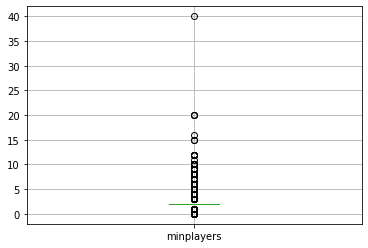

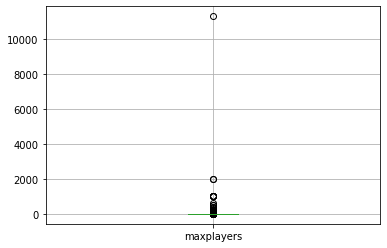

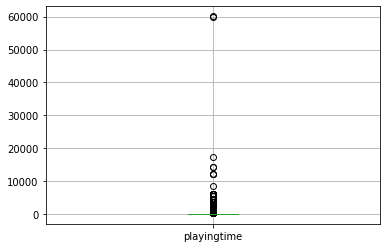

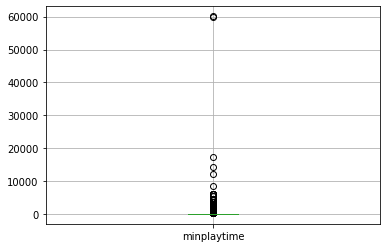

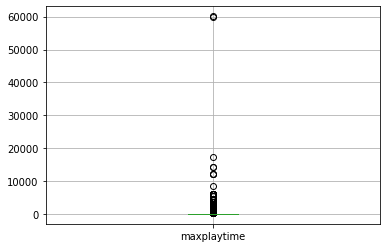

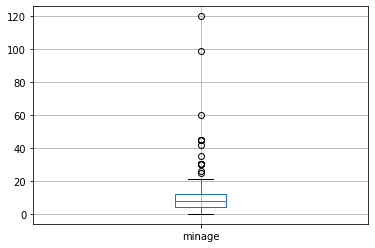

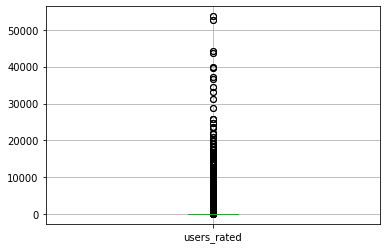

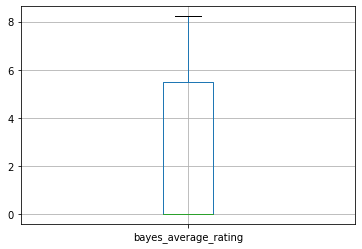

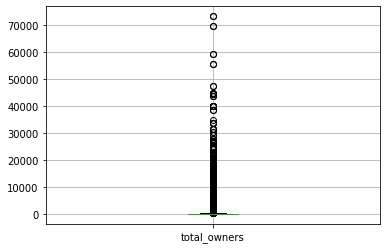

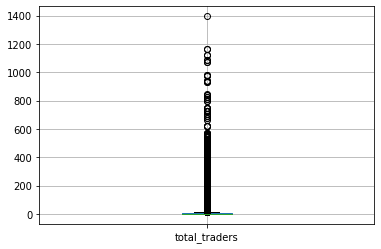

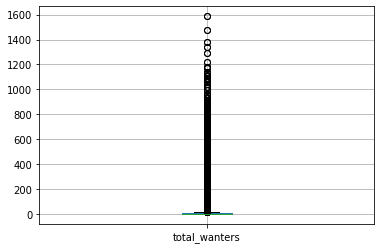

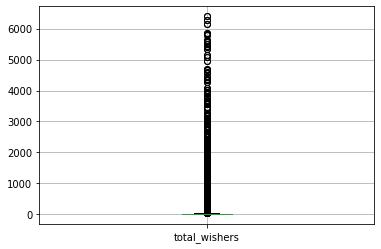

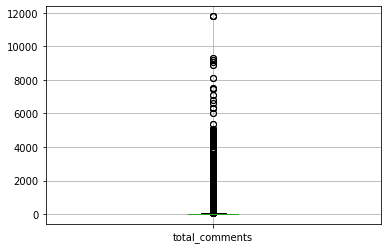

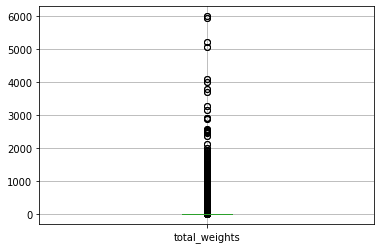

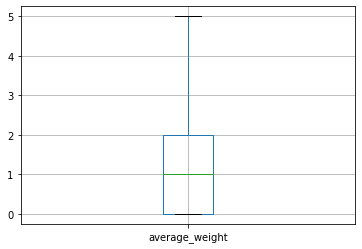

In [15]:
for c in columns:
    plt.figure()
    data.boxplot([c])

Using train_test_split to split the data into training and testing set

In [16]:
from sklearn.model_selection import train_test_split
X=data[columns]
Y=data['average_rating']


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.2)

## Using Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
predictions=lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(predictions,y_test))

2.0879786848238853


## Using Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(max_depth=3)

Depth has been limited so that it can take less space and less memory for visualizing

In [22]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=3)

In [23]:
p=rfr.predict(X_test)

print(mean_squared_error(p,y_test))

1.770834009386519


In [24]:
df = pd.DataFrame({'Real Values':np.array(y_test).reshape(-1), 'Predicted Values':p.reshape(-1)})

In [25]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [26]:
from sklearn import tree

Visualizing the first decision tree in thr Radom Forest Regressor

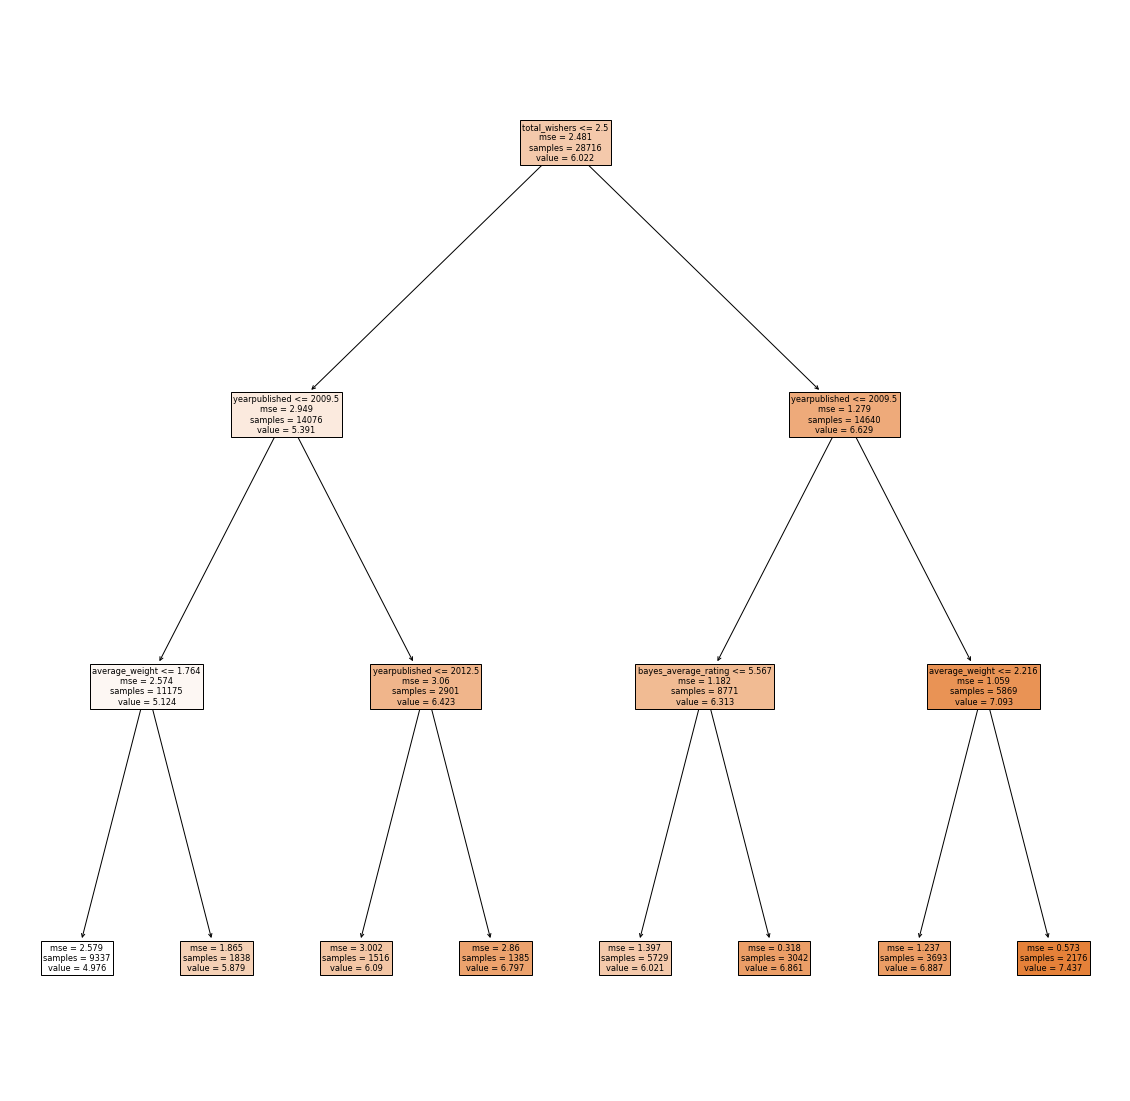

In [27]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfr.estimators_[0], feature_names=X_train.columns, filled=True)

# As we can see that RandomForestRegressor has performed better as compared to Linear Regression as Linear Regression is more responsive to outliers 

Thus this was an practice problem that shows that how the Random Forest technique is better than the Linear Regression(whose accuracy has been less due to presence of lot of outliers) 